### Lesson13

教師あり学習
①基準となるデータ(train data)を与えておく
②
③

# 線形回帰(kinear regression)

xがyを説明する
説明変数、目的変数
ノイズ
モデル
過学習

# クラスタリング
x,yの抽出の仕方（無作為？）
ノイズの目安
過学習について
クラスタリングの必要性



### Sample1

回帰係数は [45.53155127] です。
切片は -5.420669396727004 です。
学習データによる決定係数は 0.6920076270690863 です。
テストデータによる決定係数は 0.5033443224342988 です。


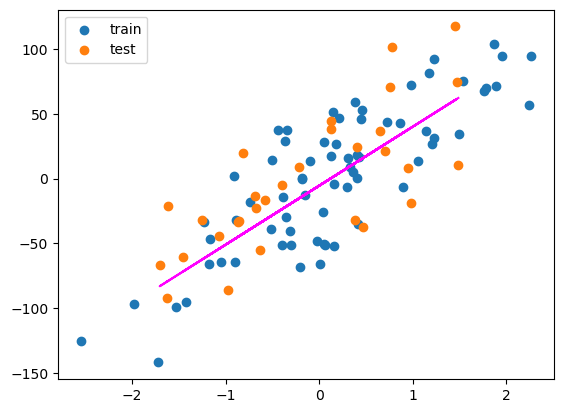

In [1]:
from sklearn import datasets
from sklearn import linear_model
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np

np.random.seed(0) # シード固定

#回帰データ作成 サンプル100, 変数の数1, ノイズ30
x, y = datasets.make_regression(n_samples=100, n_features=1, noise=30)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

e = linear_model.LinearRegression()
e.fit(x_train, y_train)

print("回帰係数は", e.coef_, "です。")
print("切片は", e.intercept_, "です。")

y_pred = e.predict(x_test)

print("学習データによる決定係数は", e.score(x_train, y_train), "です。")
print("テストデータによる決定係数は", e.score(x_test, y_test), "です。")

plt.scatter(x_train, y_train, label="train")
plt.scatter(x_test, y_test, label="test")
plt.plot(x_test, y_pred, color="magenta")
plt.legend()

plt.show()


In [4]:
x, y = datasets.make_regression(n_samples=100, n_features=1, noise=30)
y0=x*42.38550486
y0

array([[  5.49264016],
       [ -3.95577136],
       [ 49.39455019],
       [ 23.31726389],
       [ 31.39833782],
       [ 12.29753962],
       [-36.31392592],
       [-18.12128021],
       [ 38.56354889],
       [-19.69592629],
       [-47.46153275],
       [-37.20124199],
       [ 69.26699058],
       [ 43.02375121],
       [-60.82751475],
       [ 17.6572327 ],
       [  1.37575091],
       [-34.40567781],
       [-67.99481087],
       [-19.75196999],
       [  7.30242861],
       [-54.24253861],
       [ 26.89207082],
       [-46.92353968],
       [-33.34641766],
       [  7.32744275],
       [ -3.31117391],
       [-21.09480843],
       [ 42.0324391 ],
       [ 60.46466843],
       [ 72.17440248],
       [-29.80495007],
       [ 19.53647166],
       [ 61.69497901],
       [-12.23110556],
       [-13.41436387],
       [ 41.87794929],
       [ 62.89089642],
       [ 36.32129412],
       [  4.65315095],
       [ 41.71713119],
       [ 64.73523383],
       [ -2.27705357],
       [ 95

make_regression
xが説明変数、yが目的変数


### Sample2

c:\Users\user\anaconda3\envs\py39\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\user\anaconda3\envs\py39\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


[2 4 4 1 1 0 4 0 2 2 3 1 4 3 1 0 1 0 4 1 2 0 2 1 2 3 2 2 3 1 2 4 4 3 4 2 2
 0 0 0 3 0 1 2 4 2 0 4 2 3 4 0 2 2 0 4 0 0 3 1 2 0 2 1 4 3 4 3 4 4 4 2 1 0
 4 4 2 2 1 2 1 3 4 4 0 2 0 4 4 1 1 3 3 1 0 2 2 1 3 4 2 4 3 2 4 4 0 2 2 4 4
 1 2 0 0 3 3 3 2 0 0 3 4 3 1 4 0 1 3 3 4 2 4 0 3 0 0 0 4 1 2 3 2 1 2 0 0 3
 1 4 4 3 3 2 4 4 4 4 3 1 3 0 1 4 2 2 1 2 0 2 1 4 0 0 2 3 1 3 4 3 4 3 3 0 1
 0 2 4 3 0 3 2 0 4 2 1 4 0 3 3 2 3 4 3 3 2 0 1 1 4 0 3 4 3 0 3 0 2 2 4 2 1
 0 0 0 4 1 0 0 1 2 1 4 3 3 4 3 1 0 4 2 4 3 0 2 2 3 3 2 0 0 4 2 2 4 4 1 4 1
 3 0 1 3 2 4 1 0 2 1 4 1 3 1 2 3 2 3 2 3 3 1 2 2 2 4 2 3 1 3 0 1 4 4 4 2 0
 3 1 0 3 0 2 2 2 3 4 0 2 2 3 0 3 4 0 4 1 4 0 0 0 3 3 1 2 4 3 0 0 2 2 3 1 2
 4 4 1 1 3 4 0 1 3 1 0 2 2 2 3 4 2 1 2 1 4 4 2 4 4 4 0 1 4 0 4 1 2 1 2 3 3
 2 1 0 4 2 2 0 4 3 1 0 0 1 0 0 3 3 0 1 3 3 3 1 0 0 0 0 2 3 2 4 1 0 2 2 4 1
 4 1 3 0 4 0 3 4 1 0 3 4 2 0 1 3 4 2 2 1 3 2 4 1 0 3 2 3 2 4 3 2 3 2 0 4 4
 3 4 2 4 4 1 4 4 0 1 1 2 0 1 3 1 0 3 4 0 1 1 3 1 1 4 0 1 3 2 4 1 3 0 4 0 1
 0 2 0 4 3 1 3 3 1 1 0 1 

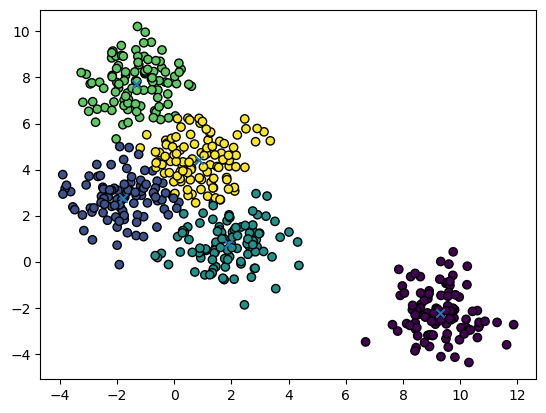

In [5]:
from sklearn import datasets
from sklearn import cluster
import matplotlib.pyplot as plt
import numpy as np

np.random.seed(0)

data, label = datasets.make_blobs(n_samples=500, n_features=2, centers=5) 

e = cluster.KMeans(n_clusters=5)
e.fit(data)

print(e.labels_)
print(e.cluster_centers_)

plt.scatter(data[:, 0], data[:, 1], marker="o", c=e.labels_, edgecolor="k")
plt.scatter(e.cluster_centers_[:, 0], e.cluster_centers_[:, 1], marker="x")

plt.show()


In [2]:
list = ['b', 'a', 'c']
sorted(list)
print(list)

list = ['b', 'a', 'c']
x = sorted(list)
print(x)

list = ['b', 'a', 'c']
list.sort()
print(list)

['b', 'a', 'c']
['a', 'b', 'c']
['a', 'b', 'c']


In [4]:
a=1
b=2
c,b = b+1,a+3
# print(a,b,c)


1 4 3


In [ ]:
c

In [9]:
data=[1,2,3,4,5]
data2=["a","b","c","d","e"]

print("****zip****")
for d in map(lambda *x:x,data, data2):
  print(d)

print("****enumerate****")
for d in map(lambda *x:x, range(len(data2)),data2):
    print(d)


****zip****
(1, 'a')
(2, 'b')
(3, 'c')
(4, 'd')
(5, 'e')
****enumerate****
(0, 'a')
(1, 'b')
(2, 'c')
(3, 'd')
(4, 'e')


In [10]:
data=[1,2,3,4,5]
data2=["a","b","c","d","e"]

print("****zip****")
for d in map(lambda a, b: (a, b), data, data2):
  print(d)

print("****enumerate****")
for d in map(lambda i, e: (i, e), range(len(data2)), data2):
    print(d)


****zip****
(1, 'a')
(2, 'b')
(3, 'c')
(4, 'd')
(5, 'e')
****enumerate****
(0, 'a')
(1, 'b')
(2, 'c')
(3, 'd')
(4, 'e')


In [11]:
data=[1,2,3,4,5]
data2=["a","b","c","d","e"]

print("****zip****")
for d in zip(*[data,data2]):
  print(tuple(d))

print("****enumerate****")
for d in enumerate(data2):
    print(tuple(d))


****zip****
(1, 'a')
(2, 'b')
(3, 'c')
(4, 'd')
(5, 'e')
****enumerate****
(0, 'a')
(1, 'b')
(2, 'c')
(3, 'd')
(4, 'e')


In [12]:
data = [1, 2, 3, 4, 5]
data2 = ["a", "b", "c", "d", "e"]

print("****zip****")
for d in zip(data, data2):
  print(d)

print("****enumerate****")
for i, d in enumerate(data2):
    print((i, d))

****zip****
(1, 'a')
(2, 'b')
(3, 'c')
(4, 'd')
(5, 'e')
****enumerate****
(0, 'a')
(1, 'b')
(2, 'c')
(3, 'd')
(4, 'e')
